In [13]:
from vae.utils import load_model, model_path

from vae.models.simple_vae import VAE
from vae.data.mnist import load_mnist

import torch
from tqdm import tqdm
from torchvision.utils import save_image, make_grid

In [14]:
learning_rate = 1e-3
epochs = 30
input_dim = 28 * 28
hidden_dim = 400
latent_dim = 20
batch_size = 128
x_dim  = 784

cuda = False
DEVICE = torch.device("cuda" if cuda else "cpu")

model = VAE(input_dim, hidden_dim, latent_dim)
vae = load_model(model=model, path=model_path() / 'simple_vae.pth')

train_loader, validation_loader, test_loader = load_mnist()

In [15]:
vae

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=400, bias=True)
    (fc2): Linear(in_features=400, out_features=400, bias=True)
    (fc3_mu): Linear(in_features=400, out_features=20, bias=True)
    (fc3_logvar): Linear(in_features=400, out_features=20, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=20, out_features=400, bias=True)
    (fc2): Linear(in_features=400, out_features=400, bias=True)
    (fc3): Linear(in_features=400, out_features=784, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
)

In [16]:
import matplotlib.pyplot as plt

model.eval()

with torch.no_grad():
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)
        
        x_hat, _, _ = model(x)


        break

def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

  0%|                                                                                                                                                      | 0/79 [00:00<?, ?it/s]


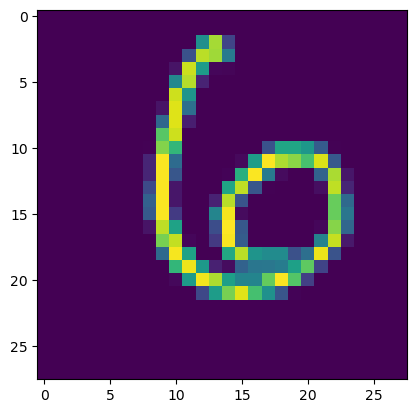

In [17]:
show_image(x, idx=100)

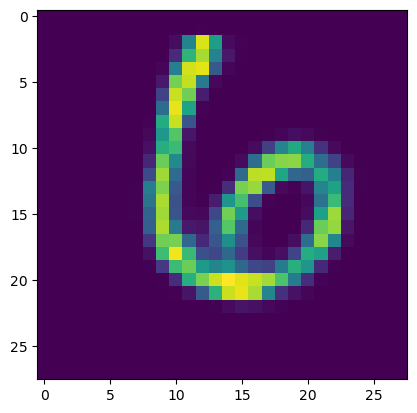

In [18]:
show_image(x_hat, idx=100)